# Comparison of standard SHAP vs SHAPr
#### i.e. Shapley values when accounting for correlation between inputs and when not. 
The paper by Aas, Jullum and Loland (arXiv:1903.10464) attempts to account for dependence between input variables when doing a shapley value analysis. Because their method is quite computationally intensive I do a comparison between the shapley values using only a few input variables. 

What we see is that the shapley values do change, however, with the case of only three inputs they are still in the same order, i.e. the ranking is the same. The distribution is also similar when looking at the beeswarm plots. 

The most striking result is that only using three of the input variables almost achieves as good a prediction as using all. 

In [1]:
library(xgboost)
library(caret)
library(readr)
library(tibble)

Loading required package: ggplot2

Loading required package: lattice



I use the BluePrint data.

First I analyze the standard shapley values of the full model to choose a subset to be used in the full model. 

In [2]:
df <- readRDS("/data/severs/clean_cancer_old.Rdata")

In [3]:
model_all_cells <- xgb.load('/data/severs/xgb_all.model')

In [4]:
train_ind_all <- read.csv("/data/severs/trainind_patient_strat.csv")$Resample1

In [5]:
Y <-  df$ESR1

In [6]:
X <-  df[,-match("ESR1", colnames(df))]

In [7]:
typeof(train_ind_all)

[1] "integer"

In [8]:
X_train <- as.matrix(X[train_ind_all,])

In [9]:
X_test <- as.matrix(X[-train_ind_all, ])

In [10]:
Y_train <- Y[train_ind_all]
Y_test <- Y[-train_ind_all]

# Standard shapley values

In [12]:
source("shap.R")

We use the approximated shapley values here for the full model. 

In [13]:
shap_result = shap.score.rank(xgb_model = model_all_cells, 
                              X_train = X_train,
                              shap_approx = T
                              )

# `shap_approx` comes from `approxcontrib` from xgboost documentation. 
# Faster but less accurate if true. Read more: help(xgboost)

Loading required package: data.table



make SHAP score by decreasing order



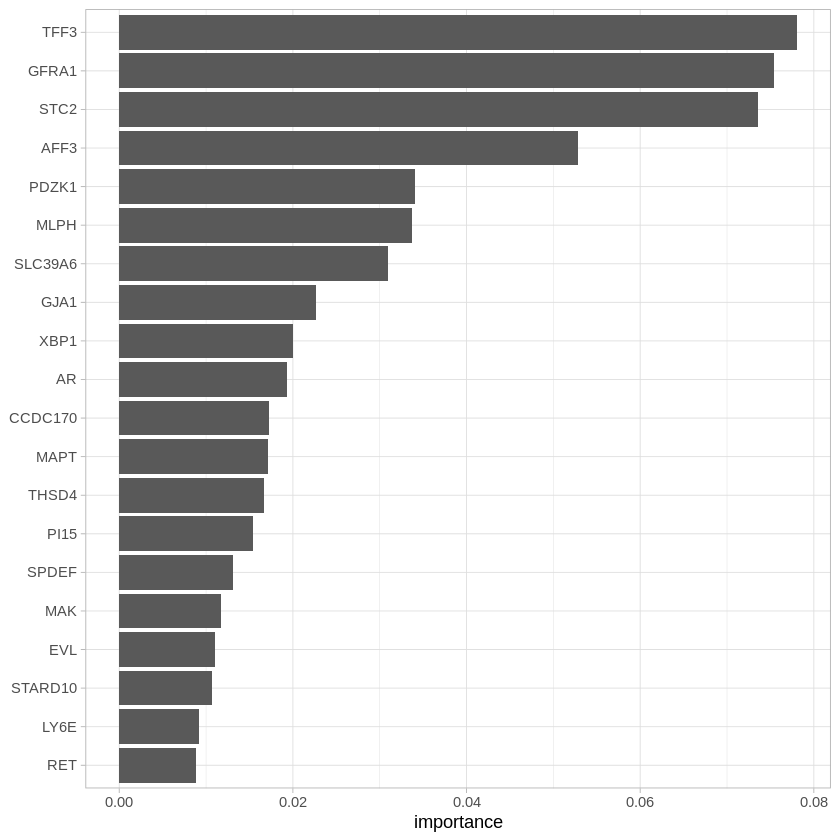

In [18]:
## Plot var importance based on SHAP
var_importance(shap_result, top_n=20)

In [378]:
head(X_train)

,FO538757.2,AP006222.2,RP11.206L10.9,LINC00115,FAM41C,SAMD11,NOC2L,KLHL17,PLEKHN1,HES4,⋯,MT.CO3,MT.ND3,MT.ND4L,MT.ND4,MT.ND5,MT.ND6,MT.CYB,AC145212.4,AL354822.1,AC240274.1
sc5rJUQ024_AAACCTGGTCTCCACT,-0.3431079,-0.08121899,-0.1592130,-0.1239286,-0.03399652,0.06160179,-0.2900718,-0.09888141,-0.09573553,-0.005237771,⋯,-3.7763107,-1.42326406,-1.3181463,-0.4776046,0.2119174,-1.242434,-1.2798681,-0.04726333,-0.09415083,0.02791595
sc5rJUQ024_AAACGGGTCTCGTATT,-0.3085218,-0.04871230,-0.1445924,-0.1168106,-0.02342445,0.11925910,-0.2583374,-0.08976943,-0.09774999,0.052327850,⋯,0.3035846,0.21310185,0.3743161,-3.4423801,0.5752632,-1.190086,0.7764649,-0.02947853,-0.07813098,0.09344671
sc5rJUQ024_AAAGCAAAGTGCGTGA,-0.3093169,-0.05328178,-0.1446797,-0.1163967,-0.02448818,0.10775566,-0.2598109,-0.08982512,-0.09872410,0.045887806,⋯,-0.9908207,-1.01187640,-0.8986120,-3.4384220,-2.6507413,-1.191080,-0.8583486,-0.03268364,-0.07879408,0.08409926
sc5rJUQ024_AACGTTGGTTCAGCGC,-0.3054029,-0.04727205,-0.1431769,-0.1159434,-0.02279125,0.12048779,6.6434746,-0.08888772,-0.09832975,0.055522864,⋯,-0.5293614,0.07700935,-3.5688587,-3.4348780,-2.6479594,-1.185283,-3.4585597,-0.02896564,-0.07680134,0.09629716
sc5rJUQ024_AACTCAGAGCCAGGAT,-0.2959715,-0.04068588,-0.1390417,-0.1136581,-0.02039749,0.13014411,-0.2475556,-0.08631131,-0.09948727,0.068170835,⋯,-3.6844419,-3.55910135,-3.5513947,-3.4153092,-2.6303906,-1.170883,-0.4026869,-0.02578251,-0.07260859,0.10949341
sc5rJUQ024_AACTCAGTCAGCTGGC,-0.3193576,-0.05909438,-0.1491602,-0.1190108,-0.02677913,0.10066849,-0.2683183,-0.09261624,-0.09717166,0.034027848,⋯,0.7384741,-0.89210189,0.9879587,0.5194138,1.1707733,-1.206476,0.3037995,-0.03519518,-0.08316524,0.07251027


In [375]:
shap_long = shap.prep(shap = shap_result,
                           X_train = X_train , 
                           top_n = 10
                           )

In [383]:
head(X)

,FO538757.2,AP006222.2,RP11.206L10.9,LINC00115,FAM41C,SAMD11,NOC2L,KLHL17,PLEKHN1,HES4,⋯,MT.CO3,MT.ND3,MT.ND4L,MT.ND4,MT.ND5,MT.ND6,MT.CYB,AC145212.4,AL354822.1,AC240274.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sc5rJUQ024_AAACCTGGTCTCCACT,-0.3431079,-0.08121899,-0.1592130,-0.1239286,-0.03399652,0.06160179,-0.2900718,-0.09888141,-0.09573553,-0.005237771,⋯,-3.7763107,-1.42326406,-1.3181463,-0.4776046,0.2119174,-1.242434,-1.2798681,-0.04726333,-0.09415083,0.02791595
sc5rJUQ024_AAACGGGTCTCGTATT,-0.3085218,-0.04871230,-0.1445924,-0.1168106,-0.02342445,0.11925910,-0.2583374,-0.08976943,-0.09774999,0.052327850,⋯,0.3035846,0.21310185,0.3743161,-3.4423801,0.5752632,-1.190086,0.7764649,-0.02947853,-0.07813098,0.09344671
sc5rJUQ024_AAAGCAAAGTGCGTGA,-0.3093169,-0.05328178,-0.1446797,-0.1163967,-0.02448818,0.10775566,-0.2598109,-0.08982512,-0.09872410,0.045887806,⋯,-0.9908207,-1.01187640,-0.8986120,-3.4384220,-2.6507413,-1.191080,-0.8583486,-0.03268364,-0.07879408,0.08409926
sc5rJUQ024_AACGTTGGTTCAGCGC,-0.3054029,-0.04727205,-0.1431769,-0.1159434,-0.02279125,0.12048779,6.6434746,-0.08888772,-0.09832975,0.055522864,⋯,-0.5293614,0.07700935,-3.5688587,-3.4348780,-2.6479594,-1.185283,-3.4585597,-0.02896564,-0.07680134,0.09629716
sc5rJUQ024_AACTCAGAGCCAGGAT,-0.2959715,-0.04068588,-0.1390417,-0.1136581,-0.02039749,0.13014411,-0.2475556,-0.08631131,-0.09948727,0.068170835,⋯,-3.6844419,-3.55910135,-3.5513947,-3.4153092,-2.6303906,-1.170883,-0.4026869,-0.02578251,-0.07260859,0.10949341
sc5rJUQ024_AACTCAGTCAGCTGGC,-0.3193576,-0.05909438,-0.1491602,-0.1190108,-0.02677913,0.10066849,-0.2683183,-0.09261624,-0.09717166,0.034027848,⋯,0.7384741,-0.89210189,0.9879587,0.5194138,1.1707733,-1.206476,0.3037995,-0.03519518,-0.08316524,0.07251027


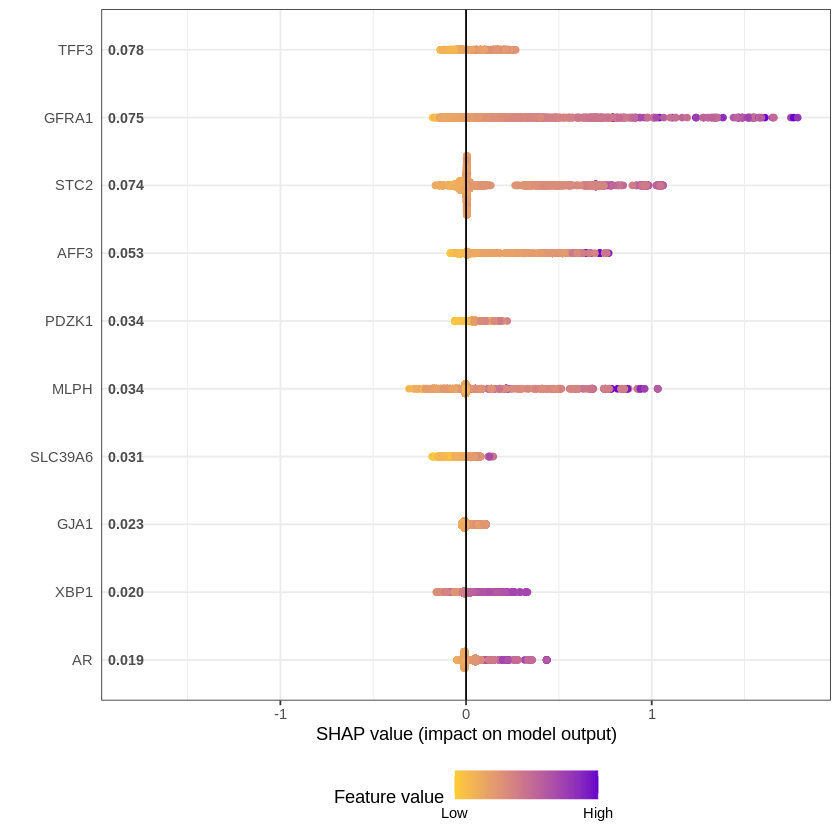

In [376]:
## Plot shap overall metrics
plot.shap.summary(data_long = shap_long)



## Shapley on differentially expressed

In [32]:
model_diff <- xgb.load('/data/severs/xgb_diffexp.model')

In [34]:
train_ind_diff <- read.csv("/data/severs/trainind_patient_strat_diffexp.csv")$Resample1

In [57]:
X_train_diff <- as.matrix(X[abs(Y)>0.5,][train_ind_diff,])

In [58]:
X_test_diff <- as.matrix(X[abs(Y)>0.5,][-train_ind_diff, ])

In [72]:
length(Y[abs(Y)>0.5])

[1] 3459

In [59]:
Y_train_diff <- Y[abs(Y)>0.5][train_ind_diff]
Y_test_diff <- Y[abs(Y)>0.5][-train_ind_diff]

In [364]:
shap_result_diff = shap.score.rank(xgb_model = model_diff, 
                              X_train = X_train_diff,
                              shap_approx = T
                              )

# `shap_approx` comes from `approxcontrib` from xgboost documentation. 
# Faster but less accurate if true. Read more: help(xgboost)

make SHAP score by decreasing order



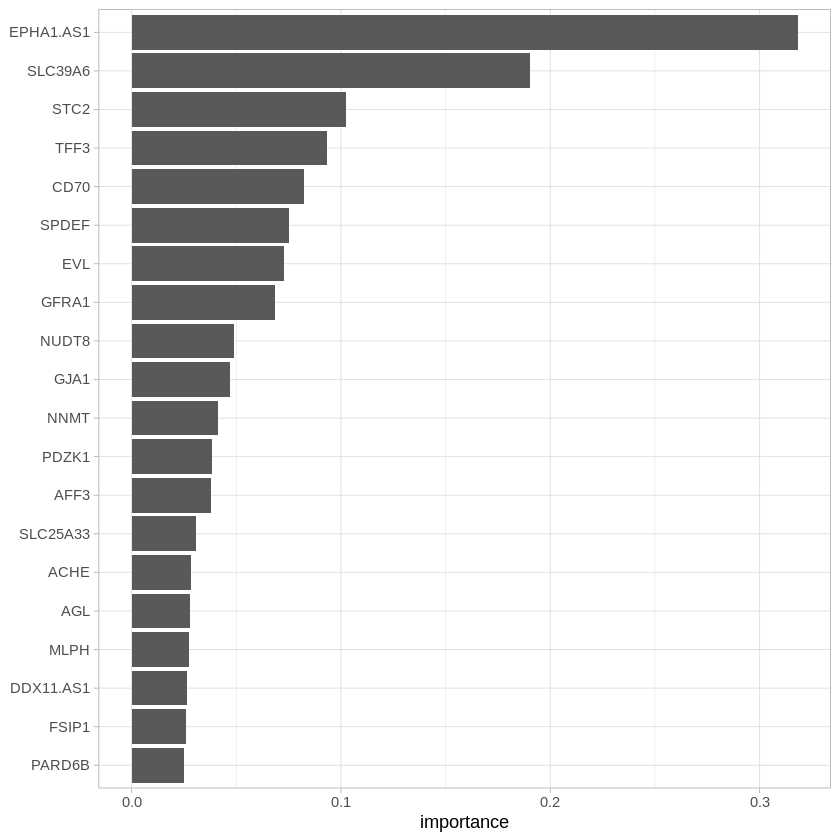

In [61]:
## Plot var importance based on SHAP
var_importance(shap_result_diff, top_n=20)

In [361]:
shap_long_diff = shap.prep(shap = shap_result_diff,
                           X_train = X_train_diff, 
                           top_n = 20
                           )

ERROR: Error in `[.data.table`(shap_score_sub, , names(shap$mean_shap_score)[1:top_n], : column(s) not found: NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA


In [360]:
dim(X_train_diff)

[1]  2768 14297

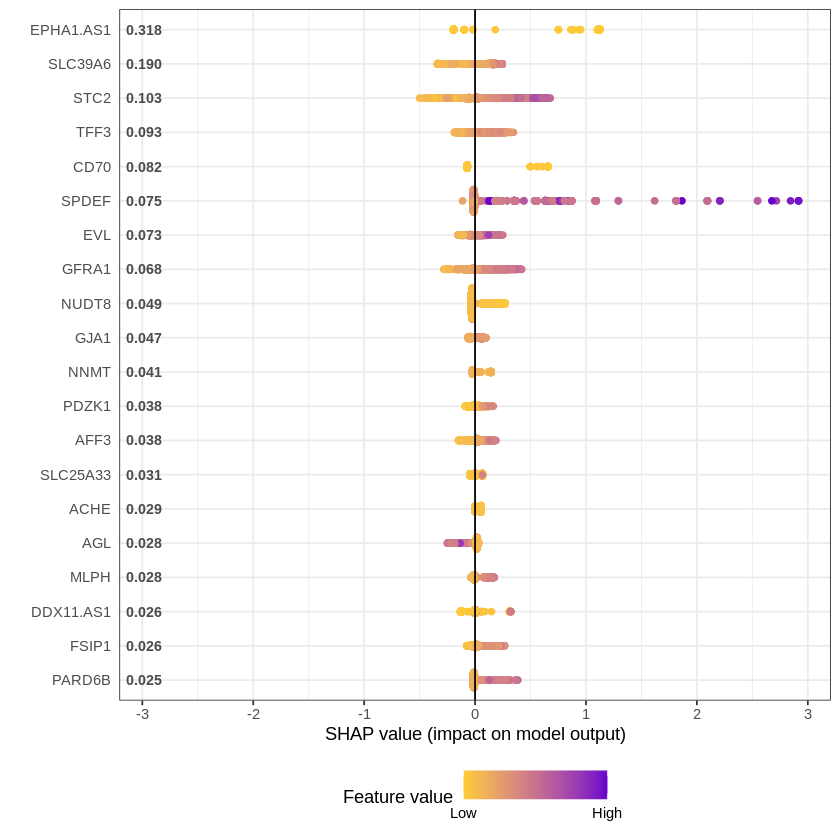

In [64]:
## Plot shap overall metrics
plot.shap.summary(data_long = shap_long_diff)

## Prediction

In [76]:
rsq <- function (x, y) cor(x, y) ^ 2
rmse <- function (x, y) sqrt(mean((x-y)^2))

In [370]:
prediction <- predict(model_diff, newdata=X_test_diff)

In [371]:
dim(X_test_diff)

[1]   691 14297

In [372]:
pred <- data.frame(list(prediction, Y_test_diff))

In [373]:
colnames(pred) <- c("prediction", "truth")
pred <- pred[order(pred$truth),]
r2score <- rsq(Y_test_diff, prediction)
rmsescore <- rmse(Y_test_diff, prediction)

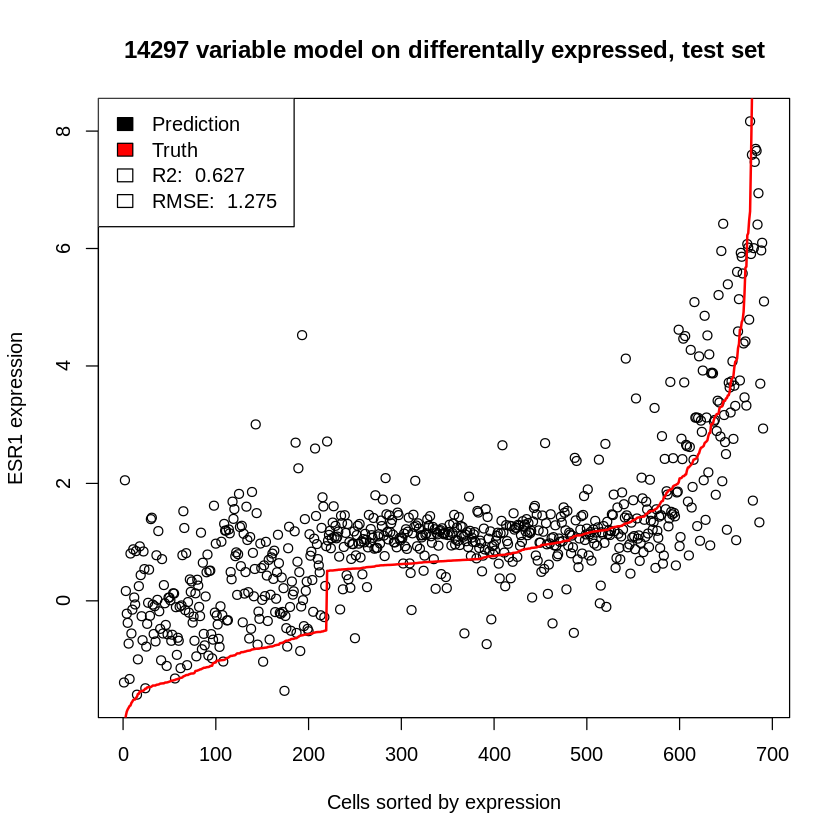

In [374]:
plot(pred$prediction, pch=1, ylab="ESR1 expression", xlab="Cells sorted by expression")
lines(pred$truth, col="red", lw=2)
legend("topleft", 
       legend=c("Prediction", "Truth",
                paste("R2: ", substr(toString(r2score), 1, 5)),
                paste("RMSE: ", substr(toString(rmsescore), 1, 5))),
       fill=c("black","red", "white", "white"))
title("14297 variable model on differentally expressed, test set")

# Train small model
This model is used to test the accuracy of 

In [299]:
x_train <- as.matrix(X[abs(Y)>0.5,][c('EPHA1.AS1', 'SLC39A6','STC2',  'TFF3')][train_ind_diff,])

In [300]:
x_test <- as.matrix(X[abs(Y)>0.5,][c('EPHA1.AS1', 'SLC39A6', 'STC2', 'TFF3')][-train_ind_diff,])

In [301]:
set.seed(2)
xgb2 <- xgboost(data = x_train, 
 label = Y_train_diff, 
 eta = 0.05,
 max_depth = 6, 
 nround=200, 
 subsample = 0.8,
 colsample_bytree = 0.8,
 eval_metric = "rmse",
 objective = "reg:squarederror",
 nthread = 40
)

[1]	train-rmse:1.952272 
[2]	train-rmse:1.904028 
[3]	train-rmse:1.850115 
[4]	train-rmse:1.798787 
[5]	train-rmse:1.750159 
[6]	train-rmse:1.709864 
[7]	train-rmse:1.668283 
[8]	train-rmse:1.626755 
[9]	train-rmse:1.593074 
[10]	train-rmse:1.553930 
[11]	train-rmse:1.518165 
[12]	train-rmse:1.484450 
[13]	train-rmse:1.457897 
[14]	train-rmse:1.428346 
[15]	train-rmse:1.401152 
[16]	train-rmse:1.375278 
[17]	train-rmse:1.349190 
[18]	train-rmse:1.326186 
[19]	train-rmse:1.304152 
[20]	train-rmse:1.285144 
[21]	train-rmse:1.264907 
[22]	train-rmse:1.246218 
[23]	train-rmse:1.229391 
[24]	train-rmse:1.213213 
[25]	train-rmse:1.196235 
[26]	train-rmse:1.180504 
[27]	train-rmse:1.167374 
[28]	train-rmse:1.153735 
[29]	train-rmse:1.141713 
[30]	train-rmse:1.131975 
[31]	train-rmse:1.120175 
[32]	train-rmse:1.110276 
[33]	train-rmse:1.099901 
[34]	train-rmse:1.090880 
[35]	train-rmse:1.082371 
[36]	train-rmse:1.075648 
[37]	train-rmse:1.069853 
[38]	train-rmse:1.061857 
[39]	train-rmse:1.054

In [302]:
prediction <- predict(xgb2, newdata=x_test)

In [303]:
pred <- data.frame(list(prediction, Y_test_diff))

In [304]:
colnames(pred) <- c("prediction", "truth")
pred <- pred[order(pred$truth),]
r2score <- rsq(Y_test_diff, prediction)
rmsescore <- rmse(Y_test_diff, prediction)

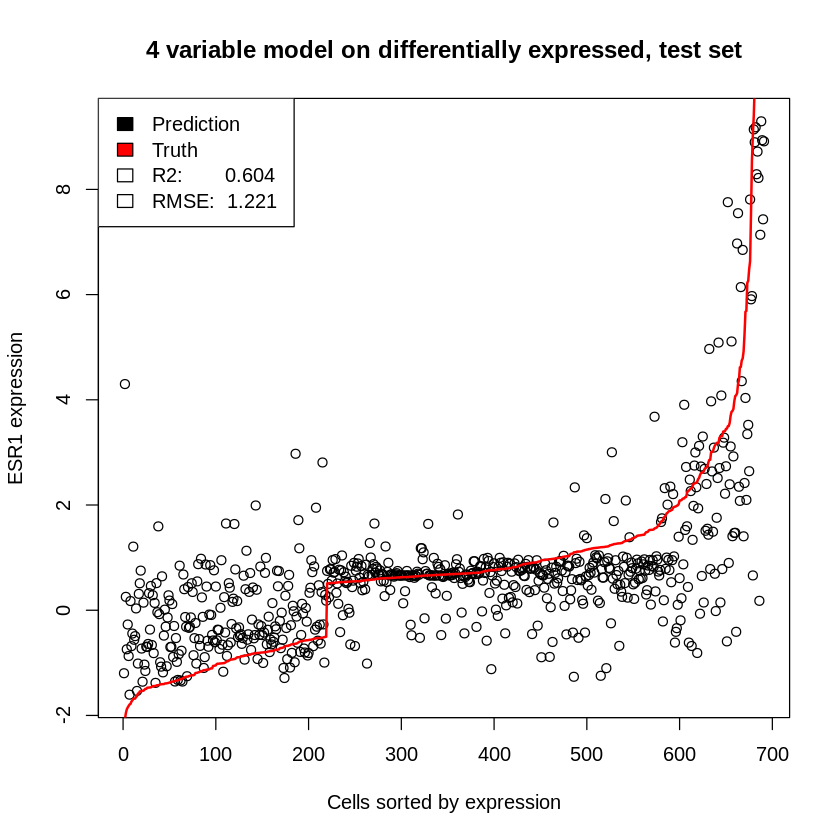

In [367]:
plot(pred$prediction, pch=1, ylab="ESR1 expression", xlab="Cells sorted by expression")
lines(pred$truth, col="red", lw=2)
legend("topleft", 
       legend=c("Prediction", "Truth",
                paste("R2:      ", substr(toString(r2score), 1, 5)),
                paste("RMSE: ", substr(toString(rmsescore), 1, 5))),
       fill=c("black","red", "white", "white"))
title("4 variable model on differentially expressed, test set")

In [362]:
shap_result_diff_small = shap.score.rank(xgb_model = xgb2, 
                              X_train = x_test,
                              shap_approx = F
                              )

# `shap_approx` comes from `approxcontrib` from xgboost documentation. 
# Faster but less accurate if true. Read more: help(xgboost)

make SHAP score by decreasing order



In [363]:
shap_long_diff_small = shap.prep(shap = shap_result_diff_small,
                           X_train = x_test, 
                           top_n = 4
                           )

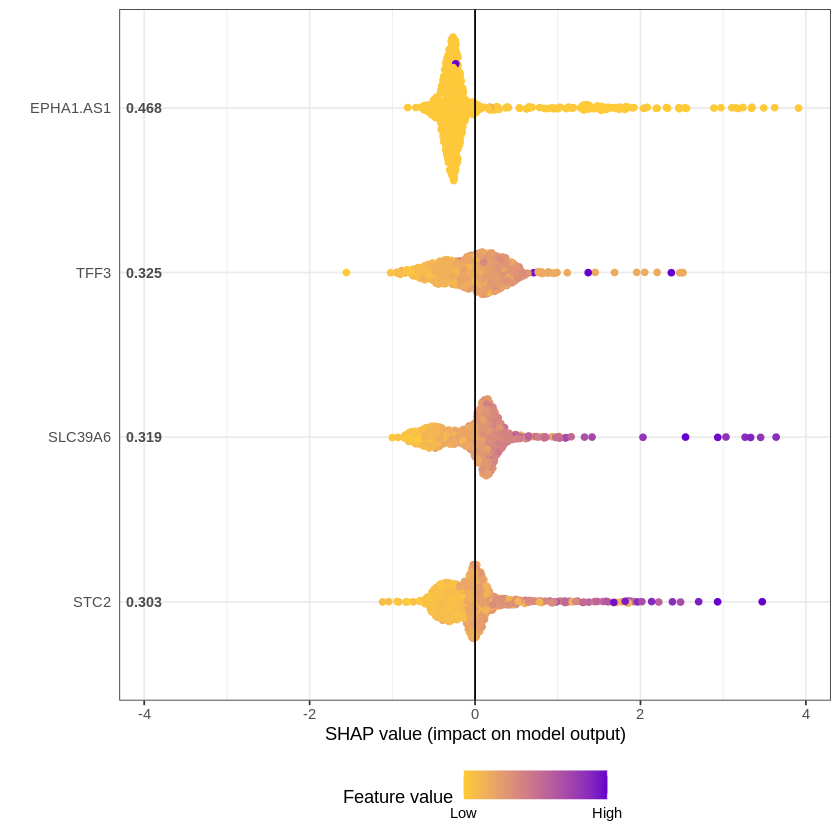

In [331]:
## Plot shap overall metrics
plot.shap.summary(data_long = shap_long_diff_small)

# Aas, Jullum, Loland analysis

In [309]:
library(shapr)

In [310]:
explainer <- shapr(x_train, xgb2)

The specified model provides feature classes that are NA. The classes of data are taken as the truth.



In [311]:
p <- mean(Y_train_diff)

In [312]:
explanation <- explain(
  x_test,
  approach = "empirical",
  explainer = explainer,
  prediction_zero = p
)

In [386]:
cor(x_train)

,EPHA1.AS1,SLC39A6,STC2,TFF3
EPHA1.AS1,1.00000000,-0.04292803,-0.02446698,-0.03597815
SLC39A6,-0.04292803,1.00000000,0.33228704,0.34282844
STC2,-0.02446698,0.33228704,1.00000000,0.20726936
TFF3,-0.03597815,0.34282844,0.20726936,1.00000000


In [387]:
dim(x_train)

[1] 2768    4

In [313]:
shapr_values <- list()

In [314]:
shapr_values$shap_score <- explanation$dt

In [315]:
shapr_values$shap_score[,1] <- NULL

In [323]:
shapr_values$mean_shap_score <- colMeans(abs(shapr_values$shap_score))

In [350]:
shapr_values$mean_shap_score <- shapr_values$mean_shap_score[c("TFF3", "STC2", "EPHA1.AS1", "SLC39A6")]

In [351]:
shapr_values$mean_shap_score

TFF3      STC2 EPHA1.AS1   SLC39A6 
0.4015526 0.3969383 0.3618043 0.3545782

In [352]:
shapr_long_diff = shap.prep(shap = shapr_values,
                           X_train = x_test, 
                           top_n = 4
                           )

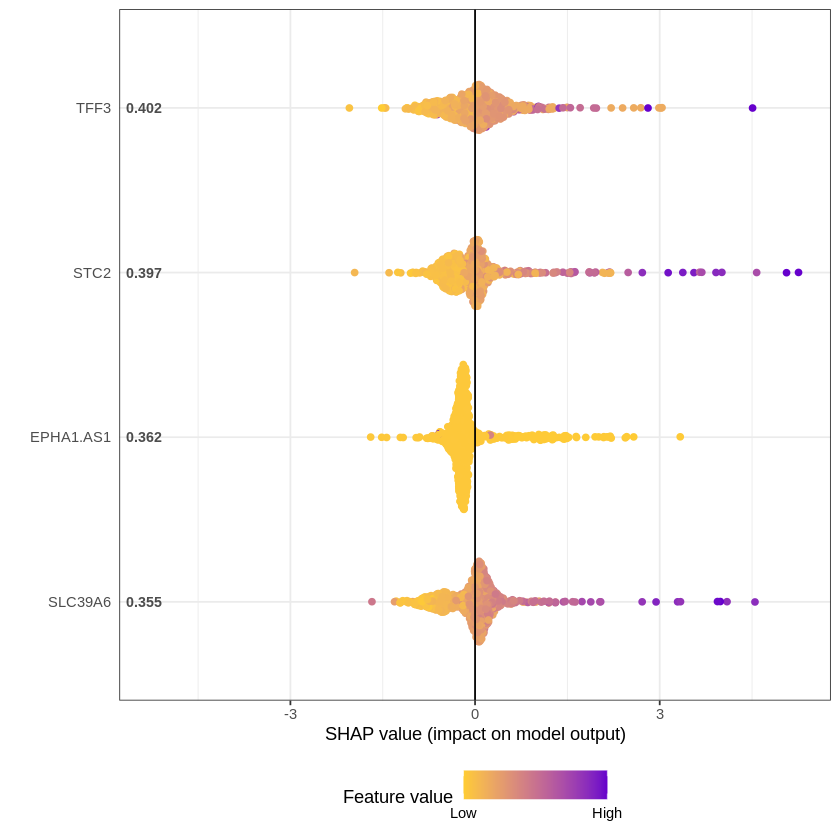

In [353]:
## Plot shap overall metrics
plot.shap.summary(data_long = shapr_long_diff)

In [354]:
mean(abs(explanation$dt)$EPHA1.AS1)

[1] 0.3618043

In [284]:
mean(abs(explanation$dt)$TFF3)

[1] 0.4601367

In [285]:
mean(abs(explanation$dt)$SLC39A6)

[1] 0.3984948

In [296]:
shap_result_diff$mean_shap_score / shapr_values$mean_shap_score

EPHA1.AS1      TFF3   SLC39A6 
1.1643306 0.8026696 0.8347217

In [287]:
shap_result_diff$mean_shap_score

EPHA1.AS1      TFF3   SLC39A6 
0.6035243 0.3693378 0.3326322

In [355]:
cor(x_train)

,EPHA1.AS1,SLC39A6,STC2,TFF3
EPHA1.AS1,1.00000000,-0.04292803,-0.02446698,-0.03597815
SLC39A6,-0.04292803,1.00000000,0.33228704,0.34282844
STC2,-0.02446698,0.33228704,1.00000000,0.20726936
TFF3,-0.03597815,0.34282844,0.20726936,1.00000000
